# Assignment 11: Clustering Customers of a Comic Book Store

In this assignment, you will be solving a traditional problem in quantitative marketing: Customer segmentation. Having a properly segmented database is extremely important to define marketing campaigns, as it allows companies to define value-centric actions targeted towards customers of different profiles. While there are several ways we can cluster customers, in this example we will use the [Recency, Frequency and Monetary Value](https://en.wikipedia.org/wiki/RFM_(market_research)), or RFM, paradigm to do so. This way of thinking of customer data reflects the engagement between a customer and a company by reducing their interactions to three values:

- The **Recency** between interactions: The time between two subsequent purchases or between two general interactions between the customer and your organization.

- The **Frequency** of interactions: The raw number of interactions over a predefined time. This can be for example how many times a customer visits your website every month, or how many purchases the customer does at your store, etc.

- The **Monetary Value** of the interactions: The total monetary value (not necessarily positive) of the interactions of the customer with your organization over the same period of time as before.

Additionally, this dataset has a **Cost of Service** variable (which is not included in the MV calculations for this example). It shows how much cost each interaction with the customer brings. This can be useful information as a customer may make purchases of small monetary value, but may spend many hours at the store occupying the service personnel's time. This can mean on average these customers may even end up being a cost to the company! The information comes from a local comic book store, and represents the summary of interactions of the customers with a loyalty card.

In this assignment, we will create a clustering of the customers using these four variables and will create a commercial strategy arising from our results.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA

%matplotlib inline

In [18]:
# Uncomment if working in the cloud
#!gdown https://drive.google.com/uc?id=1VL-LjrjgCtGWkDw914MVLj2sEttlL2Uv

## Task 1: Studying the data [10 pts]

Import the data and present the descriptive statistics of all variables. **Written answer: What can you say about the variables you have? Why should you normalize the data?**. Normalize the data so you can create clusters.

In [20]:
# Read the data
RFM_data = pd.read_csv('RFM_Assignment_Week11.csv')
RFM_data.drop(["CoS"],axis = "columns")
RFM_data.describe()

,Recency,Frequency,MV,CoS
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,30.116293,17.164128,8806.972152,8805.228492
std,17.742131,29.419952,3391.111080,3285.384316
min,-4.942628,-1.237633,760.115629,944.136187
25%,18.221827,3.710640,8065.394231,9957.361435
50%,28.588186,6.030687,10462.416975,10000.463454
75%,35.880252,9.999136,10608.634596,10041.297949
max,67.258701,102.189321,11139.504803,11054.536104


In [11]:
# Normalize (Standard) and apply to the data
normalizer = StandardScaler()
RFM_data_std = normalizer.fit_transform(RFM_data)

**Written answer:**

## Task 2: K-Means Clustering and Silhoutte Analysis [30 pts]

Now we can perform the cluster analysis. The single most important question in cluster analysis is to determine the number of clusters that you should create. Following the labs (or [this tutorial](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)), try between 3 and 8 clusters, using a seed of 10, and plot their silouhette analyses (we will plot the clusters themselves in the next question). **Written answer: What is the optimal number of clusters using the silhouette method?**

For n_clusters = 3 The average silhouette_score is : 0.7441085737382345
For n_clusters = 4 The average silhouette_score is : 0.7899120450839303
For n_clusters = 5 The average silhouette_score is : 0.7249329012890494
For n_clusters = 6 The average silhouette_score is : 0.6556732220239838
For n_clusters = 7 The average silhouette_score is : 0.6513064350384187
For n_clusters = 8 The average silhouette_score is : 0.6142740011419974


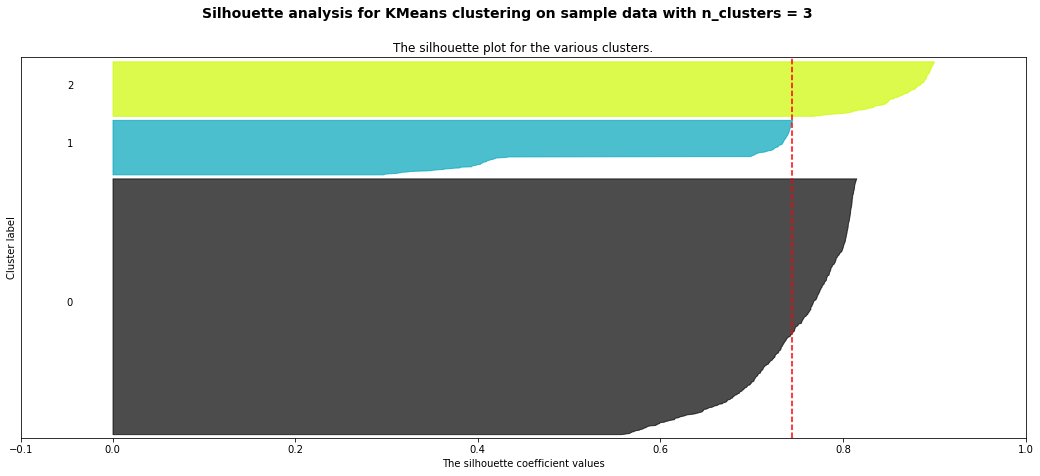

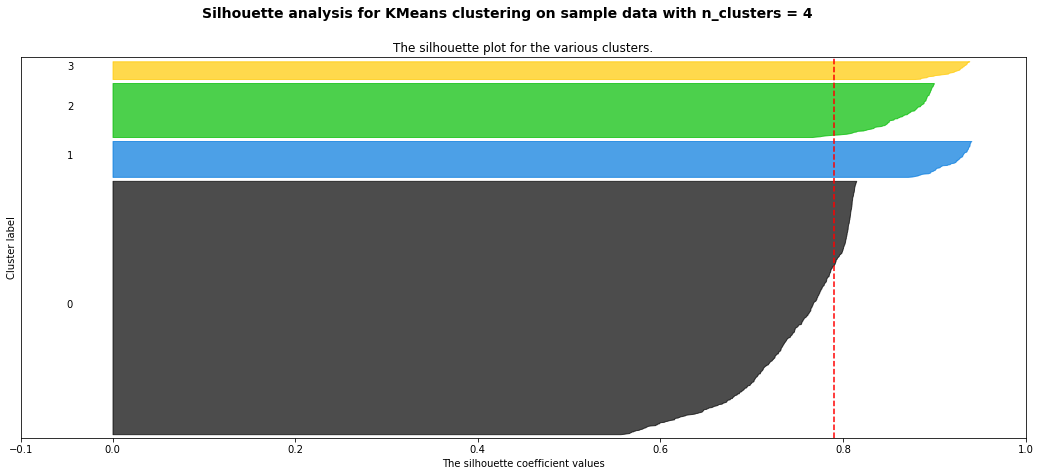

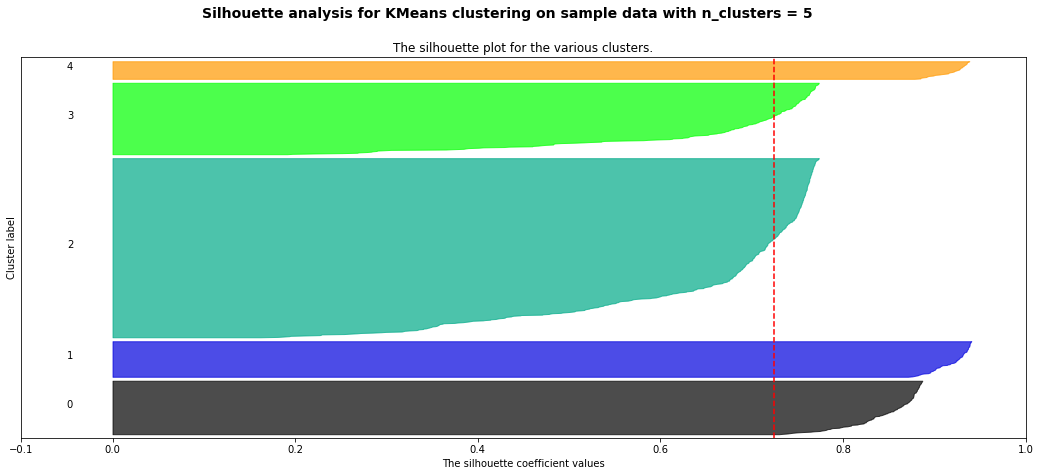

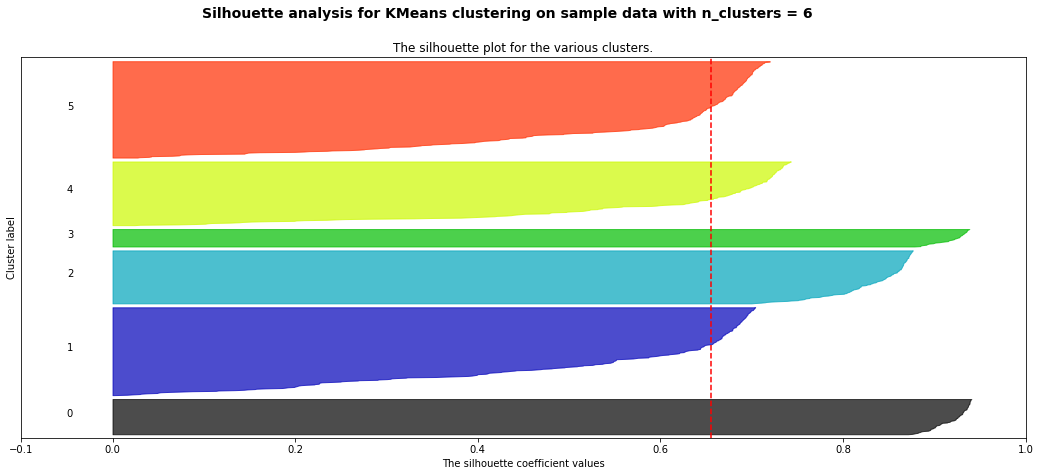

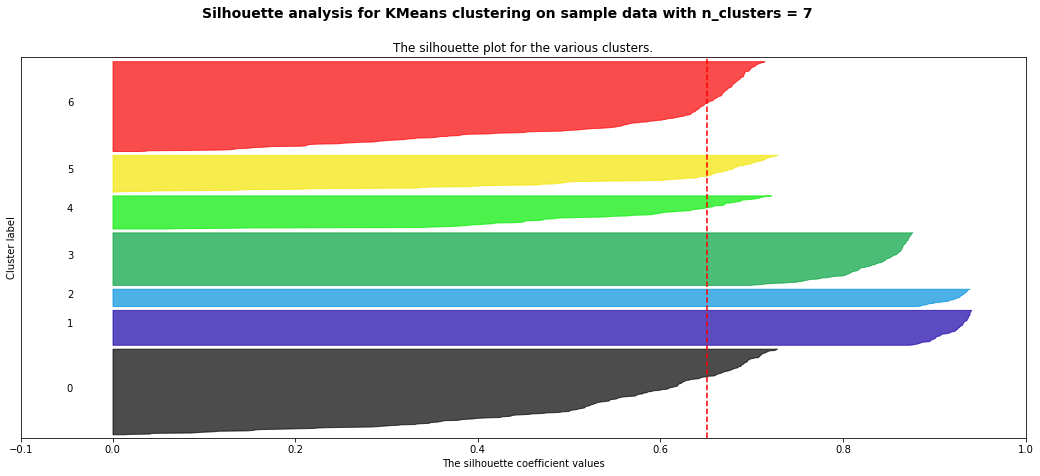

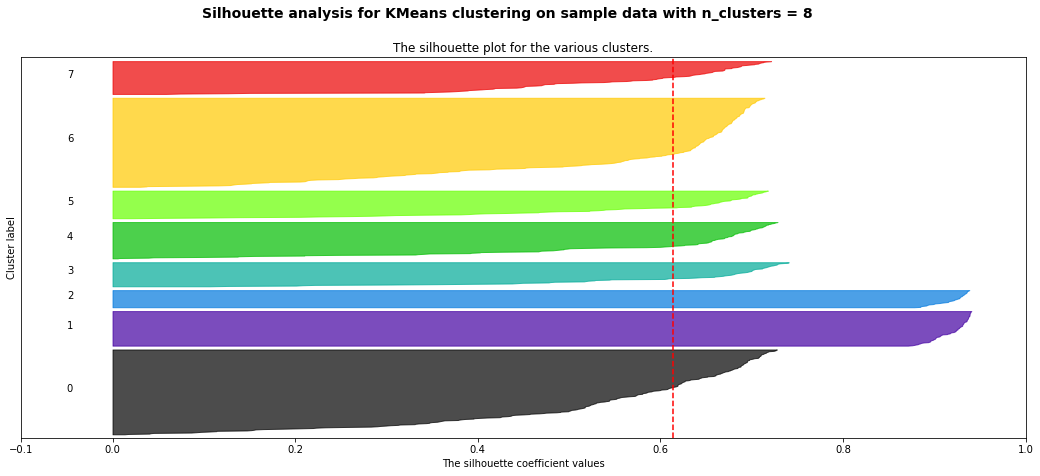

In [21]:
# Your answer here.
range_n_clusters = [3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1,1)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(RFM_data_std) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(RFM_data_std)

    silhouette_avg = silhouette_score(RFM_data_std, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(RFM_data_std, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


**Written answer:**cluster = 4 is the optimal number of clusters using the silhouette method

## Task 3: Plotting the clusters [20 pts]

Now we will visualize what we just did. For this we will use a common trick in clustering: use a PCA transform to reduce the data to a few variables (two or three) and plot those. Apply a PCA transform to the data using two components and create a scatterplot, differentiating by using colours the clusters from previous answer using a different colour. **Note the clusters still must be calculated over the unrotated data**. Use only your results from using 3, 4 and 5 clusters. **Written answer: How many clusters would you use considering the results of task 2 and these ones?**

For n_clusters = 3 The average silhouette_score is : 0.7441085737382345
For n_clusters = 4 The average silhouette_score is : 0.7899120450839303
For n_clusters = 5 The average silhouette_score is : 0.7249329012890494


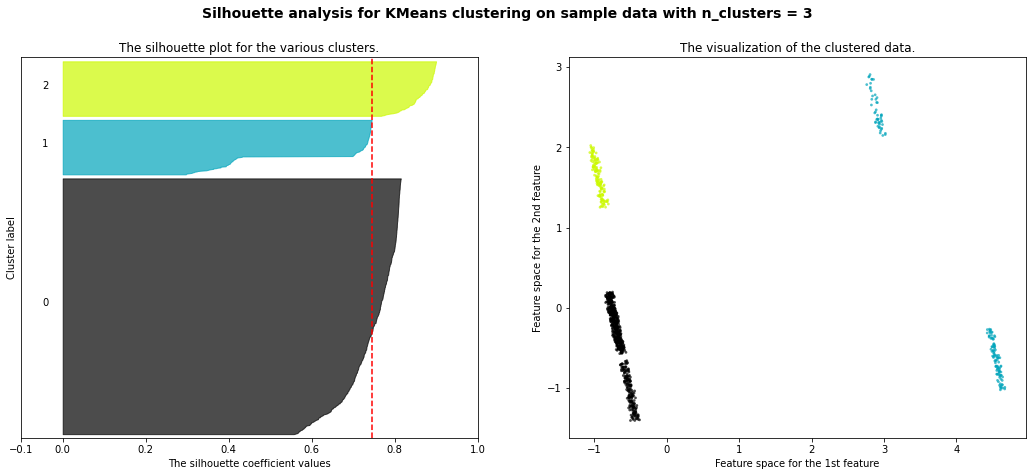

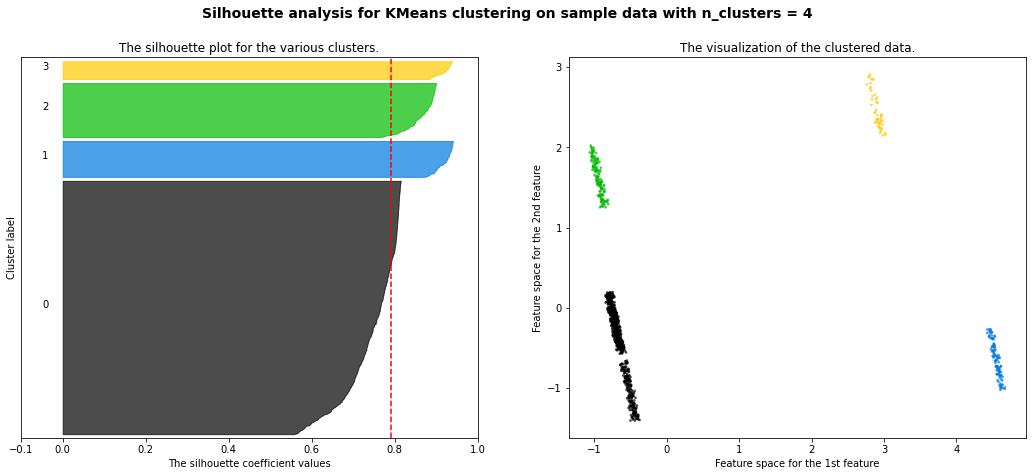

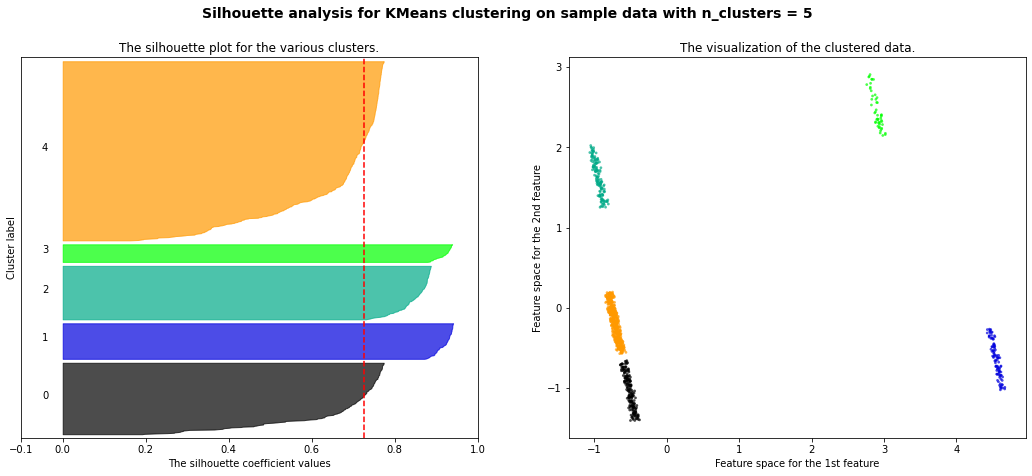

In [22]:
# Your code here. Add as many cells as you need!
range_n_clusters = [3, 4, 5]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(RFM_data_std) + (n_clusters + 1) * 10])


    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(RFM_data_std)

    silhouette_avg = silhouette_score(RFM_data_std, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(RFM_data_std, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)


        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    Q3_PCA = PCA(n_components = 2)
    Q3_X_PCA = Q3_PCA.fit_transform(RFM_data_std)
    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Q3_X_PCA[:, 0], Q3_X_PCA[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')


    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**Written answer**5 clusters i would use considering the results of task 2 and these ones

## Task 4: Deploying the model. [20 pts]

The objective of any cluster analysis over customer data is to create a reasonable segmentation of your customers. Using the number of clusters you have decided in Task 3 and a table of the averages per variable for each cluster, name the different clusters and think what would a company would do with a customer in that cluster. (*Hint: For example a clusters with high frequency, low recency, and low monetary value are desirable customers for whom it would be a good plan to try to increase their monetary value while keeping their high engagement. You could name them "Diamonds in the rough". [Pandas' `groupby`](https://stackoverflow.com/questions/30328646/python-pandas-group-by-in-group-by-and-average) can probably help.*)

In [25]:
# Your code here.
Q4_clusterer = KMeans(n_clusters=5, random_state=10)
Q4_cluster_labels = Q4_clusterer.fit_predict(RFM_data_std)

RFM_data.groupby("Cluster").mean()

,Recency,Frequency,MV,CoS
Cluster,,,,
0,14.911803,10.008273,10996.540746,9999.457148
1,2.167553,99.947029,1153.133946,1005.710736
2,30.017272,5.059000,10494.803018,10000.188643
3,58.743535,50.159107,876.930495,1090.134542
4,59.809092,0.868768,8007.350500,11001.099604


**Written answer: (note this answer will be much longer than usual as you need to make an argument for every cluster)**
cluster = 0, low recency, low frequency and high mv are desirable customers for whom it would be a good plan to try to increase their frequecy while keeping their high engagement
cluster = 1, low recency, high frequency and low mv are desirable customers for whom it would be a good plan to try to increase their monetary value while keeping their high engagement
cluster = 2,low frequency and high mv are desirable customers for whom it would be a good plan to try to increase their frequecy while decrease their recency.
cluster = 3 are deirable customers for whom it would be a good plan to try to increase their monetary value while decrease their recency.
cluster = 4,high recency, low frequency, we couldnot acutually do anything, they are just not interested.

## Task 5: Hierarchical clustering comparison [20 pts]

Now repeat the clustering process using a complete linkage hierarchical clustering with cosine affinity, using the same number of clusters as Task 4. Using the PCA transform you calculated in Task 3, create a scatterplot differentiating the obtained clusters using different colours. **Written answer: What can you say about the new clustering you obtained? Why does this happen? When would you say it is a good idea to use this configuration?** 

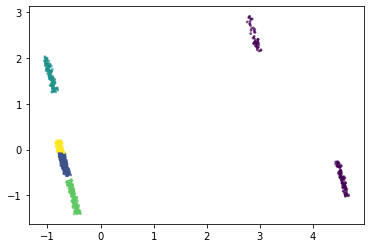

In [26]:
# Your code here
Q5_model = AgglomerativeClustering(n_clusters=5,     
                                   affinity='cosine', 
                                   linkage="complete")

Q3_PCA = PCA(n_components = 2)
Q3_X_PCA = Q3_PCA.fit_transform(RFM_data_std)

Q5_X = pd.DataFrame(Q3_X_PCA)
Q5_X['cluster_label'] = Q5_model.fit_predict(Q3_X_PCA)

plt.scatter(Q5_X[[0]], Q5_X[[1]], marker='.', s=30, lw=0, alpha=0.7,
            c=Q5_X['cluster_label'], edgecolor='k')

**Written answer:**it distribute many very small clusters and then merge together so the right two clusters merge together has a higher value, and the right blue and green clusters are more close to 0 so they are given a high weighted so they breaks into to parts. In this case hierarchical is not a good idea, beacause hierarchical would distribute into some large clusters and in the large clusters there are some small groups.